## Prediction heart disease using Machine Learning 

This notebook looks into using various Python-based Machine Learning & Data Science Libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take following approach:
1. Problem Defination
2. Data
3. Evaluation 
4. Features
5. Modelling
6. Experimentation


#### 1. Problem Defination

In a statement ,
> Given clinical parameters about a patient , can we predict whether or not they have heart disease??

#### 2. Data
The original data came from the clevland data from UCI Machine Learning Repository.
https://www.kaggle.com/competitions/heart-disease-uci/overview

#### 3. Evaluation 
> If we acn reach 95% accuaracy at predicting whether or not a patient has heart disease or not during the proof of concept, We 'ii pursue the project

#### 4. Features

This Where you will get different information about each of the feature in your Data
**Create a Data Dictionry**

# create a Data dictionary
* age. The age of the patient.

* sex. The gender of the patient. (1 = male, 0 = female).

* cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).

* trestbps. Resting blood pressure in mmHg.

* chol. Serum Cholestero in mg/dl.

* fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).

* restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).

* thalach. Max heart rate achieved.

* exang. Exercise induced angina (1 = yes, 0 = no).

* oldpeak. ST depression induced by exercise relative to rest.

* slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).

* ca. Number of major vessels (0–3) colored by flourosopy.

* thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).

* num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

## Preparing the tools

We're going to use pandas,numpy,matplotlib for Data Analysis and manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns


## Models from Scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df= pd.read_csv("heart-disease .csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Data Exploration ( Exploratory Data Analysis (EDA))


Getting Familiar with The Data and find more about The Subject

and become a subject matyter export on the Data Set

1. What questions(s) I am trying to solve?
2. What Kind of Data Do We Have & how to treat different types?
3. What's missing from the Data and how do you deal with it?
4. Where are the otliers are and why should we care about them?
5. How can you add , change or Remove features to tget more out of Data.

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

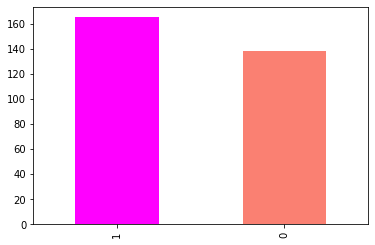

In [6]:
df["target"].value_counts().plot(kind="bar",color=["magenta","salmon"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease Frequency According to sex

In [9]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with Sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [11]:
(df.target==1).mean()

0.5445544554455446

In [12]:
72/96

0.75

In [13]:
93/207

0.4492753623188406

In [14]:
(72+93)/(303)

0.5445544554455446

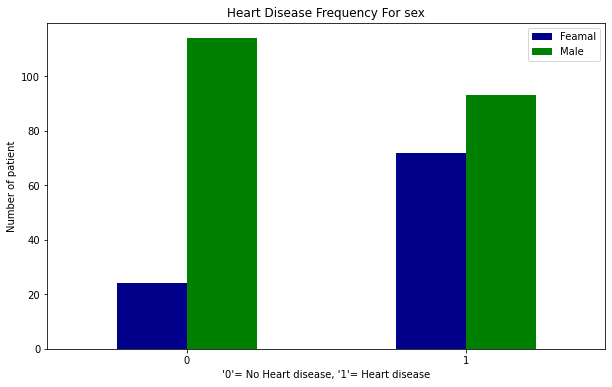

In [15]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",color=["darkblue","green"],figsize=(10,6));
plt.title("Heart Disease Frequency For sex");
plt.xlabel(" '0'= No Heart disease, '1'= Heart disease ")
plt.ylabel("Number of patient");
plt.legend(["Feamal","Male"]);
plt.xticks(rotation=1);

# Age vs. Max Heart rate for Heart disease

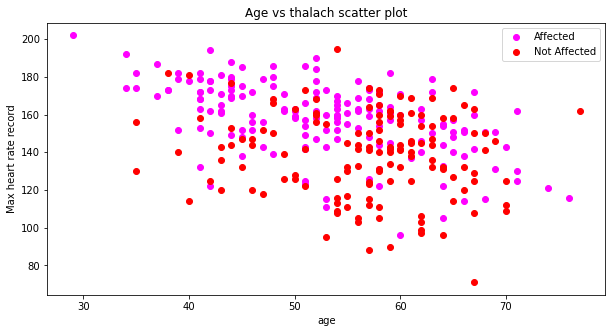

In [16]:
plt.figure(figsize=(10,5))
# Scatter With Positive
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="magenta")
plt.title("Age vs thalach scatter plot");
plt.xlabel("age");
plt.ylabel("Max heart rate record");

### neg example on same plot
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="red");
plt.legend(["Affected","Not Affected"]);




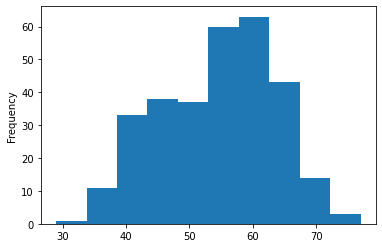

In [17]:
# check the distrubution of histogram
df.age.plot.hist();

## Heart Disease Frequency per chest pain type

 Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).

In [18]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


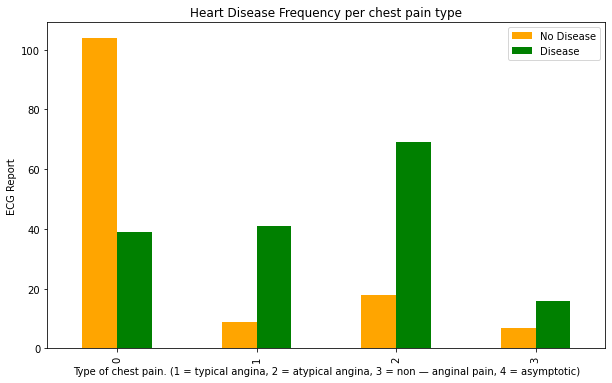

In [19]:
##Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["orange",'green']);
plt.title("Heart Disease Frequency per chest pain type");
plt.xlabel("Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic)")
plt.ylabel("ECG Report");
plt.legend(["No Disease","Disease"]);


In [20]:
# Make Corelation Metrics 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


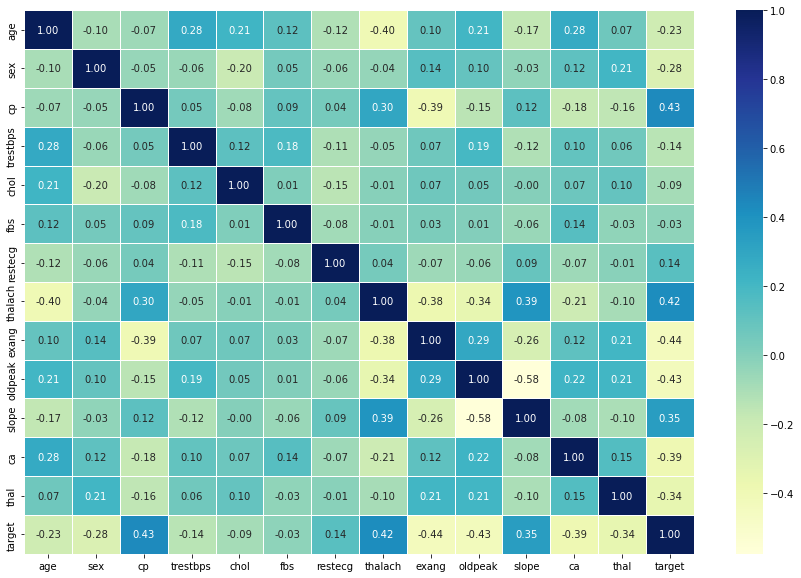

In [21]:
# let's make our correlation litle more visual
corr_matrix= df.corr()
fig,ax= plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths=0.5,
                fmt="0.2f",
                cmap="YlGnBu")

# Exang vs Target column

We are Trying to see if there is any correlation between them

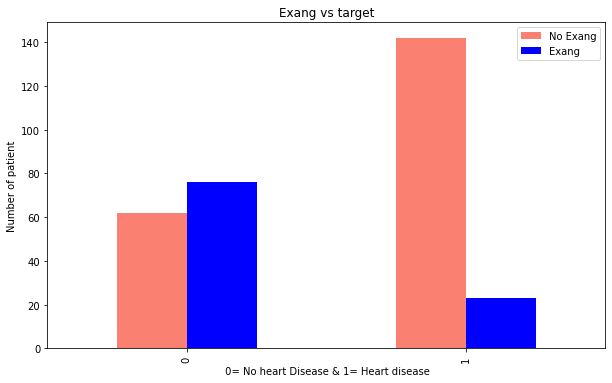

In [22]:
pd.crosstab(df["target"],df["exang"]).plot(kind="bar",figsize=(10,6),color=["salmon",'blue'])
plt.xlabel(" 0= No heart Disease & 1= Heart disease");
plt.ylabel("Number of patient");
plt.title("Exang vs target")

plt.legend(["No Exang","Exang"]);

## 5. Modelling


In [23]:
df[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
## Split Data into x and y
x= df.drop("target",axis=1)
y=df["target"]


np.random.seed(9)
## Splitting for train & Test split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)




We will try 3 Different Machine Learning Models:
1. Logistics Regression
2. K-Nearesrt Neighbours Classifier
3. Random Forest Classifier

In [25]:
# Put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
       "kNN":KNeighborsClassifier(),
       "Random_forest": RandomForestClassifier()}

# Create a fuction 
def fit_and_score(models,x_train,x_test,y_train,y_test):
    '''
    Fits and evaluates given Machine Learning model:
    models : a dict of different Scikit -Learn Machine Learning models
    x_train: training feature 
    x_test: Feature for Testing,
    y_train: Training labels,
    y_test: Testing label
    '''
    # set random seed
    np.random.seed(9)
    # Make Dictionary to keep model score
    model_scores={}
    #Loop through model
    for name,model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model & append it in the dictionary
        model_scores[name]= model.score(x_test,y_test)
    return model_scores   

In [26]:
model_scores= fit_and_score(models= models,x_train=x_train,
                           x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\dibak\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'kNN': 0.7049180327868853,
 'Random_forest': 0.7540983606557377}

### Model comparision

In [27]:
model_comapare= pd.DataFrame(model_scores,index=["accuracy"]
                            )
model_comapare

,Logistic Regression,kNN,Random_forest
accuracy,0.836066,0.704918,0.754098


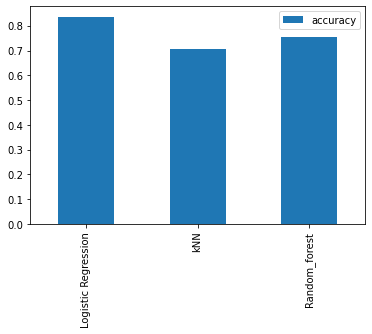

In [28]:
model_comapare.T.plot.bar();

Now We have have got a Baseline model.. & we know a model's first

predictions aren't always what we we should our next steps off.

What should do?

Let's Look at the following:
* Hyperparameters tunning 
* Feature importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under curve(AUC)


# Hyperparameter Tuning

In [29]:
# Let's tune KNN
train_score=[]
test_score=[]
# Create a List of different values for n-neighbours
neighbours= range(1,21)

# Setup KNN instance
knn= KNeighborsClassifier()

#Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    # Fit The algorithm
    knn.fit(x_train,y_train)
    
    ## Update training score list
    train_score.append(knn.score(x_train,y_train))
    ## Update the test scores
    test_score.append(knn.score(x_test,y_test))

In [30]:
train_score

[1.0,
 0.8016528925619835,
 0.7892561983471075,
 0.7355371900826446,
 0.7396694214876033,
 0.7479338842975206,
 0.731404958677686,
 0.7066115702479339,
 0.7066115702479339,
 0.7107438016528925,
 0.7148760330578512,
 0.7024793388429752,
 0.6859504132231405,
 0.7066115702479339,
 0.6900826446280992,
 0.6942148760330579,
 0.7066115702479339,
 0.6942148760330579,
 0.6942148760330579,
 0.6735537190082644]

In [31]:
test_score

[0.7049180327868853,
 0.5901639344262295,
 0.7377049180327869,
 0.639344262295082,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.6721311475409836,
 0.6885245901639344,
 0.639344262295082,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869]

Maximum KNN score on The test Data : 75.41%


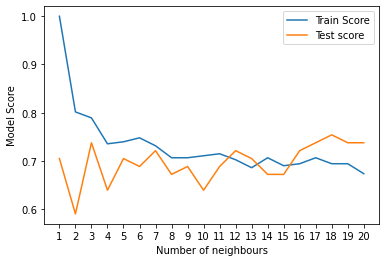

In [32]:
plt.plot(neighbours,train_score,label="Train Score")
plt.plot(neighbours,test_score,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on The test Data : {max(test_score)*100:0.2f}%")

## Hyperparameter Tuning With RandomSearchCV
We are going to tune our 

* logistics Regression
* Random Forest Model
### Using RandomizedSearchCV

In [33]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [34]:
# Create a Hyperparameter grid for logistics Regression
log_grid={"C":np.logspace(-4,4,20),
         "solver":["liblinear"]}
# Create a Hyperparameter grid for randomizedSeachCV
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split": np.arange(2,20,2),
        'min_samples_leaf':np.arange(1,20,2)}

Now we have got the hyperparameter grids setup for each of our models
, let's tune them using RandomizedSearchCV

In [35]:
## Tune LogisticsRegression
np.random.seed(9)

# Setup random HyperparameterSearch for LogisticsRegression
rs_lod_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_grid,
                              cv= 5,
                              n_iter=20,
                              verbose=2)

#Fit random HyperParameter Search Model for LogisticsRegression
rs_lod_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [36]:
rs_lod_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [37]:
rs_lod_reg.score(x_test,y_test)

0.8360655737704918

## Now We will be Tuning our RandomForestClassifier


In [38]:
#Setup random seed
np.random.seed(9)


rf_reg= RandomizedSearchCV(RandomForestClassifier(),
                      param_distributions=rf_grid,
                          n_iter=50,
                          cv=5,
                          verbose= True)

## Fitting the model
rf_reg.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
rf_reg.best_params_

{'n_estimators': 510,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': None}

In [40]:
rf_reg.score(x_test,y_test)

0.8032786885245902

## Hyperparameter Tuning With GridSearchCV

Since LogisticsRegression Model provides the best score

so far, We will try and improve them again using GridSearchCV

In [41]:
np.random.seed(9)

## Different Hyperparameter for our Logistics Model
log_reg_grid={'C': np.logspace(-4,4,30),
             'solver': ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,verbose=True,
                         return_train_score=True,
                         n_jobs=1
                         )

## Fitting The Model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             return_train_score=True, verbose=True)

In [42]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(x_test,y_test)    #0.8360655737704918

0.8360655737704918

## Evaluating Our tuned Machine Learning
* ROC Curve & AUC Score 
* Confusion Matrix
* Classification Report
* F1 Score
* Recall
* Precision

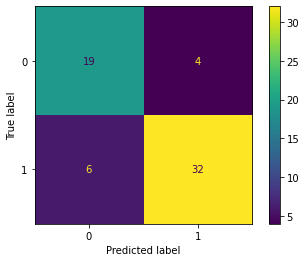

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,gs_log_reg.predict(x_test));

In [47]:
## Make Prediction of with tuned ML
y_preds= gs_log_reg.predict(x_test)
(y_preds==y_test).mean()

0.8360655737704918

C:\Users\dibak\sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


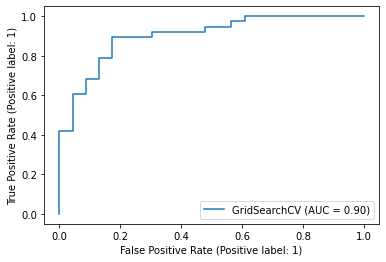

In [48]:
# Import Roc curve Function from sklearn.metrics  

# Plot ROC Curve and calculate AUC metrics
plot_roc_curve(gs_log_reg,x_test,y_test);

Now we've got a ROC curve & AUC Score now f1,recall,precision,classification report

In [50]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.89      0.84      0.86        38

    accuracy                           0.84        61
   macro avg       0.82      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



### Claculate Evaluation metrics using Cross-validation 
We are going to calculate precision,f1, recall of our model using Cross-validation and to do sowe will

be using`cross_val_score()

In [51]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [52]:
## Create a new classifier with best parameters
clf= LogisticRegression(C=1.3738237958832638,solver='liblinear')


In [54]:
#cross_validation_accuracy
cr_v_acc= cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cr_v_acc,cr_v_acc.mean()

(array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667]),
 0.8215300546448088)

In [58]:
# Cross val Precision
cr_v_pr= cross_val_score(clf,x,y,cv=5,scoring="precision")
cr_v_pr, cr_v_pr.mean()

(array([0.78947368, 0.90322581, 0.85294118, 0.83333333, 0.71052632]),
 0.817900063251107)

In [59]:
# Cross val Recall
cr_v_recall= cross_val_score(clf,x,y,cv=5,scoring="recall")
cr_v_recall, cr_v_recall.mean()

(array([0.90909091, 0.84848485, 0.87878788, 0.90909091, 0.81818182]),
 0.8727272727272727)

In [61]:
# Cross val F1
cr_v_f1= cross_val_score(clf,x,y,scoring='f1',cv=5)
cr_v_f1,cr_v_f1.mean()


(array([0.84507042, 0.875     , 0.86567164, 0.86956522, 0.76056338]),
 0.8431741323998502)

In [74]:
# Visualize metrics
cv_metrics = pd.DataFrame({"Accuracy":cr_v_acc.mean(),
                          "Precision":cr_v_pr.mean(),
                          "Recall": cr_v_recall.mean(),
                          "f1_score":cr_v_f1.mean()},
                         index=["Score"])
dict1= {"Accuracy": cr_v_acc.mean(),"Precision":cr_v_pr.mean(),"Recall": cr_v_recall.mean(),"f1_score":cr_v_f1.mean()}
cv_metrics

,Accuracy,Precision,Recall,f1_score
Score,0.82153,0.8179,0.872727,0.843174


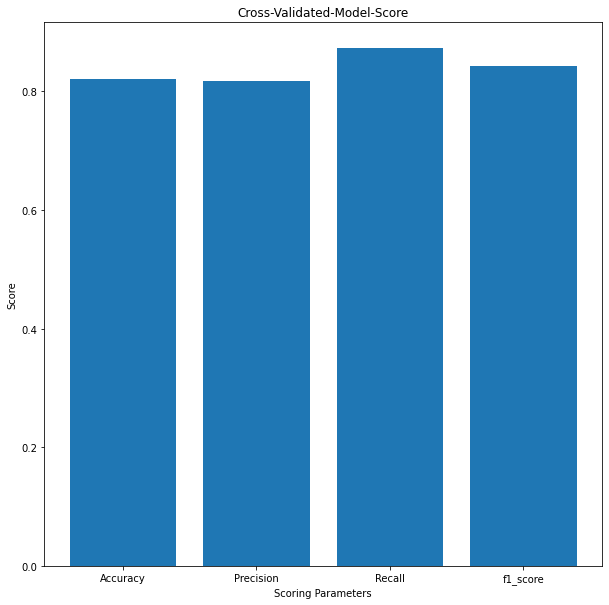

In [80]:
fig,ax=plt.subplots(figsize=(10,10))
ax.bar(dict1.keys(),dict1.values());
ax.set(ylabel="Score",xlabel="Scoring Parameters")
ax.set_title("Cross-Validated-Model-Score");

### Feature Importance

Feature importance is another way of asking -- " Which feature contributed more to the outcome of the model

How did they contributed"



Finding feature importance is different for every Machine Learning Model.{ Take help from Google}
for example https://towardsdatascience.com/a-look-into-feature-importance-in-logistic-regression-models-a4aa970f9b0f



Let's find feature Importance for Logistic Regresssion Model

In [82]:
# Fit & INSTANCE OF lOGISTICrEGRESSION
gs_log_reg.best_params_
clf=LogisticRegression(C=1.3738237958832638,
                      solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [83]:
# Check Co-ef
clf.coef_

array([[-0.00202069, -1.65428114,  0.74838338, -0.02018369, -0.0018454 ,
         0.19102832,  0.65350685,  0.03415412, -0.80084069, -0.5935933 ,
         0.59229446, -0.75009276, -0.84486436]])

In [84]:
df[:1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [85]:
## Match Coef to columns
feature_dict =dict(zip(df.columns,list(clf.coef_[0])))

In [86]:
feature_dict

{'age': -0.0020206899806011714,
 'sex': -1.654281141072259,
 'cp': 0.7483833802335644,
 'trestbps': -0.020183685544205805,
 'chol': -0.0018453980503898176,
 'fbs': 0.19102831854330776,
 'restecg': 0.653506845656361,
 'thalach': 0.034154116708461926,
 'exang': -0.8008406932938423,
 'oldpeak': -0.5935933041411618,
 'slope': 0.592294457376654,
 'ca': -0.7500927613898544,
 'thal': -0.8448643581691281}

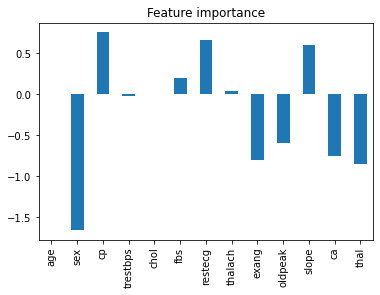

In [89]:
## Visualize feature importance
feature_df= pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False);

<AxesSubplot:xlabel='sex'>

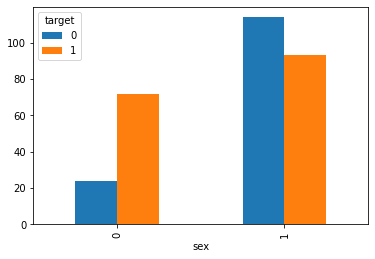

In [90]:
pd.crosstab(df["sex"],df["target"]).plot(kind="bar");

<AxesSubplot:xlabel='slope'>

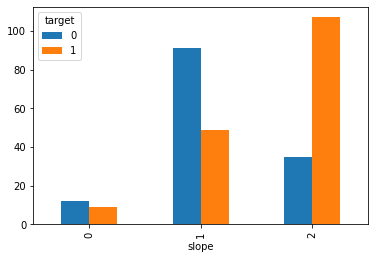

In [91]:
pd.crosstab(df.slope,df.target).plot(kind="bar");

## 6. Experimentation